In [5]:
import numpy as np
import glob
import matplotlib.pyplot as plt, mpld3
mpld3.enable_notebook()

In [13]:
# Calibration
m = 0.8741586926259176
b = -10.031221336877318
m_new = 0.8398160567649131
b_new = -9.016848123325374
background =np.loadtxt('Calibrations/BackgroundRadiation40gain610volts120sec.Spe',skiprows=12, max_rows=1023)

In [7]:
files = glob.glob('Cesium_Aluminum/*.Spe')
cesium_al_dict = {}

for f in files:
    angle = f.split('CesiumAl')[1].split('degrees')[0]
    time = f.split('volts')[1].split('sec')[0]
    data = np.loadtxt(f,skiprows=12, max_rows=1023)
    entry = {'filename':f, 'time':time,'data':data}
    cesium_al_dict[angle] = entry

In [8]:
calibration_files = glob.glob('Calibrations/CesiumNoTarget*.Spe')
calibrations = {}

for f in calibration_files:
    angle = f.split('CesiumNoTarget')[1].split('degrees')[0]
    time = f.split('volts')[1].split('sec')[0]
    data = np.loadtxt(f,skiprows=12, max_rows=1023)
    entry = {'filename':f, 'time':time,'data':data}
    calibrations[angle] = entry

In [9]:
calibrations

{'70': {'filename': 'Calibrations\\CesiumNoTarget70degrees40gain610volts420sec.Spe',
  'time': '420',
  'data': array([ 0.,  0.,  0., ...,  8., 10., 14.])},
 '90': {'filename': 'Calibrations\\CesiumNoTarget90degrees40gain610volts840sec.Spe',
  'time': '840',
  'data': array([ 0.,  0.,  0., ..., 35., 24., 22.])},
 '110': {'filename': 'Calibrations\\CesiumNoTarget110degrees40gain610volts840sec.Spe',
  'time': '840',
  'data': array([ 0.,  0.,  0., ..., 24., 33., 19.])},
 '130': {'filename': 'Calibrations\\CesiumNoTarget130degrees40gain610volts840sec.Spe',
  'time': '840',
  'data': array([ 0.,  0.,  0., ..., 29., 25., 20.])},
 '150': {'filename': 'Calibrations\\CesiumNoTarget150degrees40gain610volts840sec.Spe',
  'time': '840',
  'data': array([ 0.,  0.,  0., ..., 23., 32., 27.])},
 '10': {'filename': 'Calibrations\\CesiumNoTarget10degrees40gain610volts420sec.Spe',
  'time': '420',
  'data': array([ 0.,  0.,  0., ..., 18., 18., 13.])},
 '30': {'filename': 'Calibrations\\CesiumNoTarget30d

In [10]:
from scipy.optimize import curve_fit

def gauss(x, H, A, x0, sigma):
    return H + A * np.exp(-(x - x0) ** 2 / (2 * sigma ** 2))

def gauss_fit(x, y):
    mean = sum(x * y) / sum(y)
    sigma = np.sqrt(sum(y * (x - mean) ** 2) / sum(y))
    popt, pcov = curve_fit(gauss, x, y, p0=[min(y), max(y), mean, sigma])
    return popt

def gauss_fit_to_spectrum(input_x,input_y,x1,x2, angle):
    xdata = input_x[x1:x2]
    ydata = input_y[x1:x2]
    H, A, x0, sigma = gauss_fit(xdata, ydata)
    # offset, amplitude, center, sigma
    
    plt.plot(input_x*m+b,input_y)

    plt.plot(xdata*m+b, ydata, label='data')
    plt.plot(xdata*m+b, gauss(xdata, H, A, x0, sigma), '--r', label='fit')

    plt.legend()
    plt.title('Gaussian fit ' + angle + ' deg')
    plt.xlabel('X position')
    plt.ylabel('Intensity (A)')
#     plt.show()
#     print(np.array([x0*scale, energy_peak]))
    return x0*m+b

In [11]:

cesium_al_dict['0']['x1'] = 790
cesium_al_dict['0']['x2'] = 855

cesium_al_dict['5']['x1'] = 780
cesium_al_dict['5']['x2'] = 850

cesium_al_dict['10']['x1'] = 700
cesium_al_dict['10']['x2'] = 880

cesium_al_dict['15']['x1'] = 600
cesium_al_dict['15']['x2'] = 800

cesium_al_dict['20']['x1'] = 600
cesium_al_dict['20']['x2'] = 800

cesium_al_dict['25']['x1'] = 600
cesium_al_dict['25']['x2'] = 800

cesium_al_dict['30']['x1'] = 600
cesium_al_dict['30']['x2'] = 700

cesium_al_dict['50']['x1'] = 400
cesium_al_dict['50']['x2'] = 600

cesium_al_dict['70']['x1'] = 300
cesium_al_dict['70']['x2'] = 500

cesium_al_dict['90']['x1'] = 250
cesium_al_dict['90']['x2'] = 400

cesium_al_dict['110']['x1'] = 250
cesium_al_dict['110']['x2'] = 300

cesium_al_dict['130']['x1'] = 200
cesium_al_dict['130']['x2'] = 300

cesium_al_dict['150']['x1'] = 150
cesium_al_dict['150']['x2'] = 350

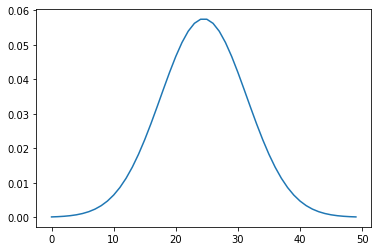

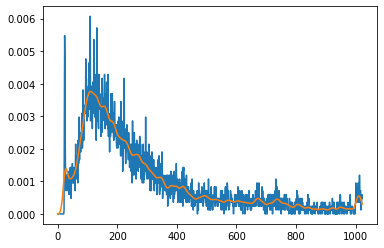

In [12]:
# plt.plot(bins*m+b, cesium_al_dict['70']['data'])
normalized_bg = background/np.sum(background)

kernel_x = np.linspace(-25,25,50)
sigma = np.sqrt(50.)
kernel = np.exp(-(kernel_x) ** 2 / (2 * sigma ** 2))
kernel = kernel/np.sum(kernel)
plt.figure()
plt.plot(kernel)

smoothed_bg = np.convolve(normalized_bg, kernel,'same')
plt.figure()
plt.plot(normalized_bg)
plt.plot(smoothed_bg)

In [7]:
np.sum(kernel)

0.9999999999999998

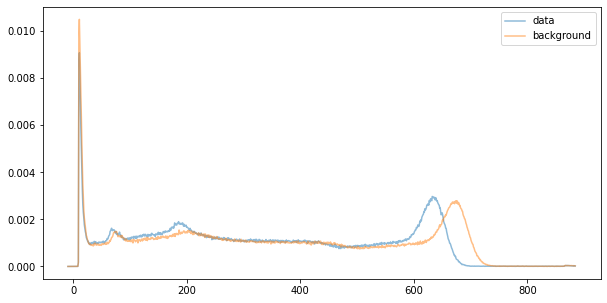

In [47]:
angle='150'
normalized_data = cesium_al_dict[angle]['data']/np.sum(cesium_al_dict[angle]['data'])
normalized_bg = calibrations[angle]['data']/np.sum(calibrations[angle]['data'])
bins = np.linspace(1,1023,1023)
plt.plot(bins*m+b,normalized_data,label='data',alpha=0.5)
plt.plot(bins*m+b,normalized_bg,label='background',alpha=0.5)
plt.legend()

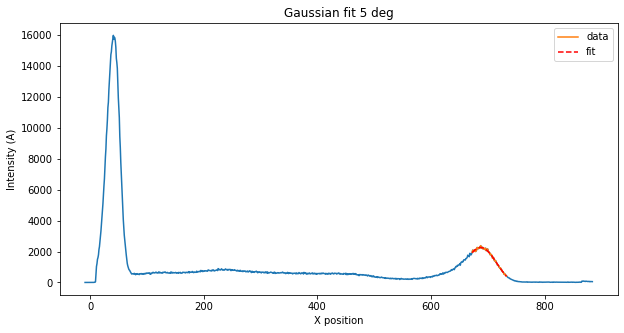

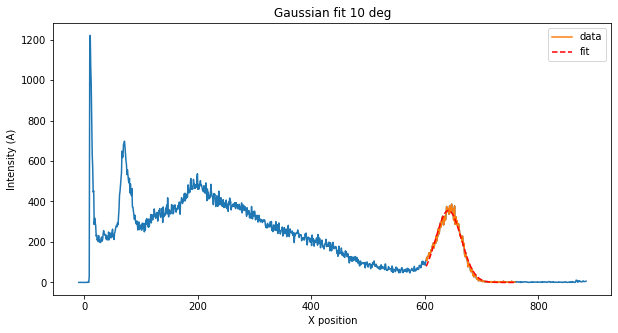

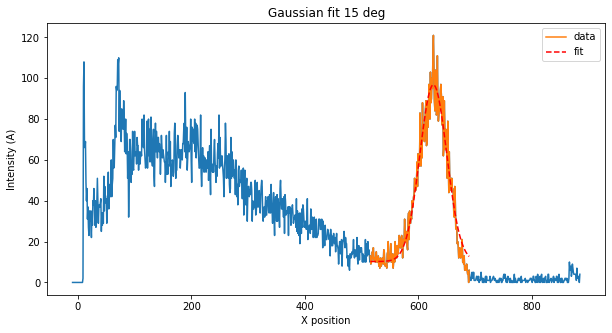

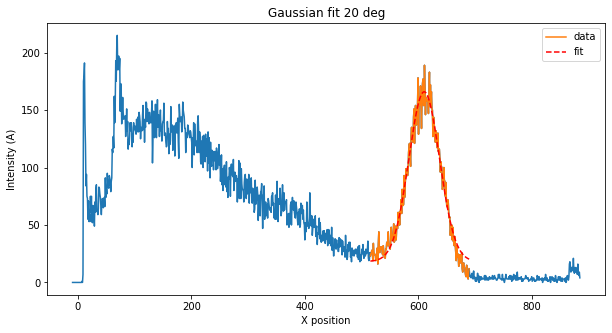

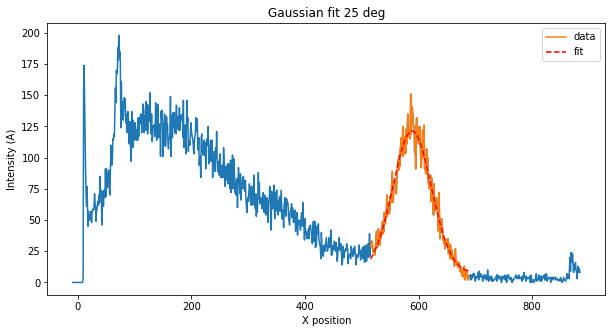

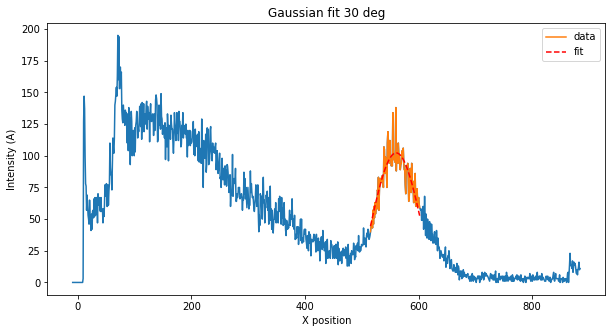

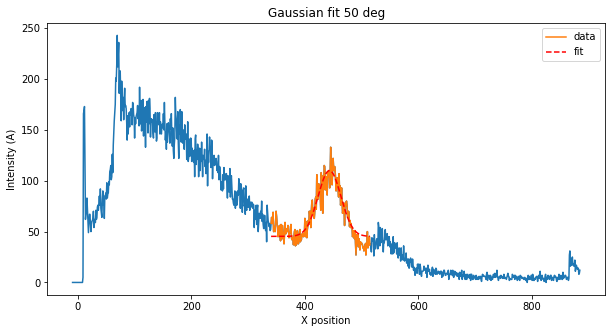

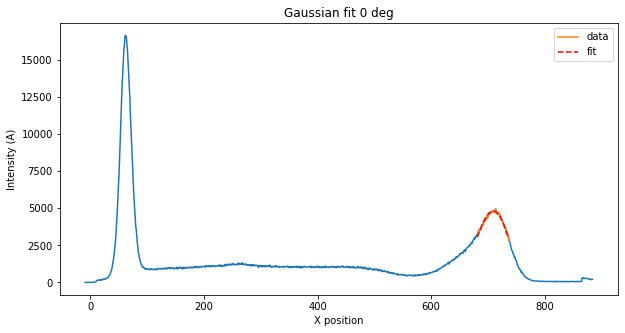

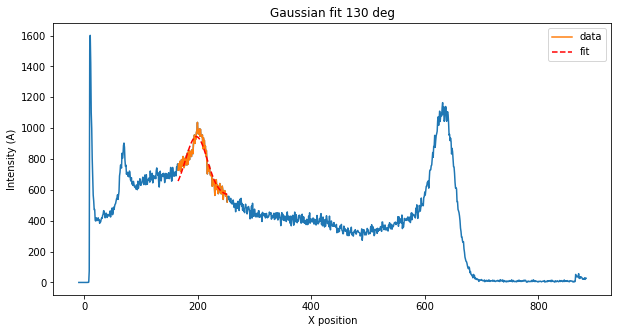

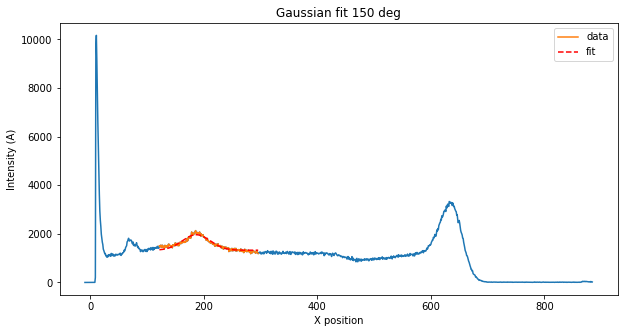

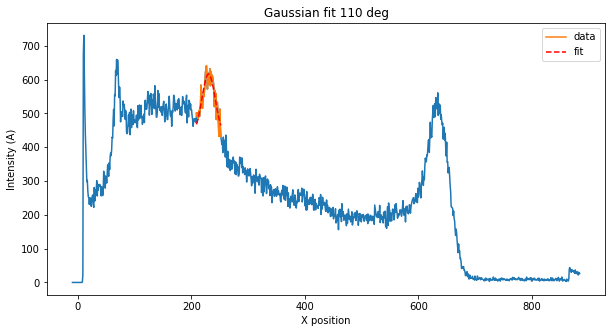

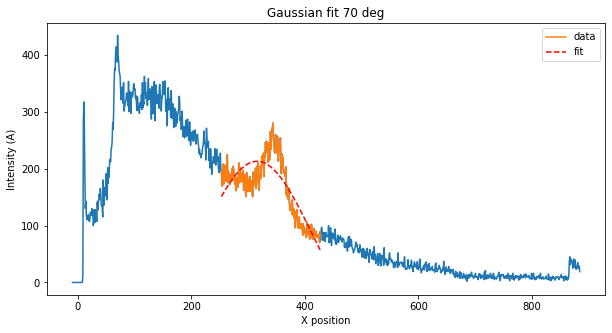

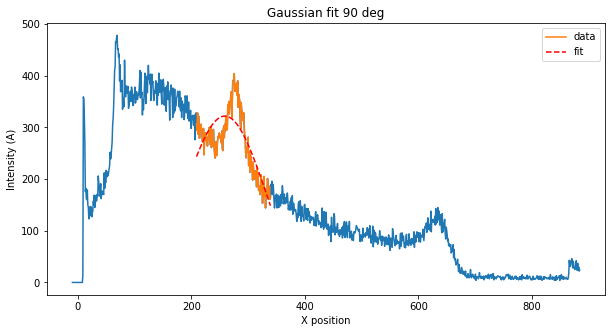

In [48]:
bins = np.linspace(1,1023,1023)
plt.rcParams['figure.figsize'] = [10, 5]
data = []
for angle, entry in cesium_al_dict.items():
#     plt.plot(entry['data']-background * (int(entry['time'])/120), label = angle)
    x1 = entry['x1']
    x2 = entry['x2']
    plt.figure()
#     plt.plot(entry['data'])
#     plt.plot(calibrations[str(angle)]['data'])
    spectrum = entry['data']#- calibrations[str(angle)]['data']
    data.append([int(angle),gauss_fit_to_spectrum(bins,spectrum,x1,x2, angle)])
#     plt.plot(bins*m+b, calibrations[str(angle)]['data'])
#     plt.show()
# #     plt.plot(bins,entry['data']-background * (int(entry['time'])/120), label = angle + ' deg')
#     plt.title(angle + ' deg')


In [49]:
angles = np.transpose(np.array(data))[0]
shifts = np.transpose(np.array(data))[1]

Text(0.5, 1.0, 'Cesium Source Aluminum Scattering Target')

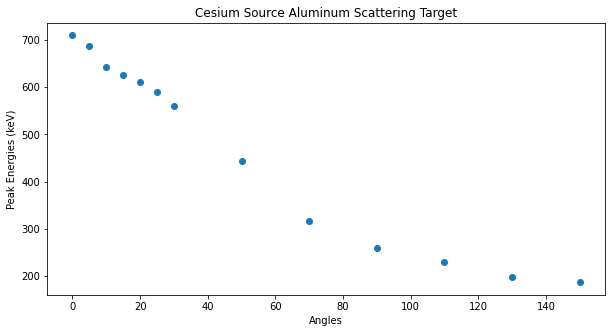

In [50]:
plt.figure()
plt.plot(angles, shifts,'o')
plt.xlabel('Angles')
plt.ylabel('Peak Energies (keV)')
plt.title('Cesium Source Aluminum Scattering Target')

Text(0.5, 1.0, 'Cesium Source Lead Scattering Target')

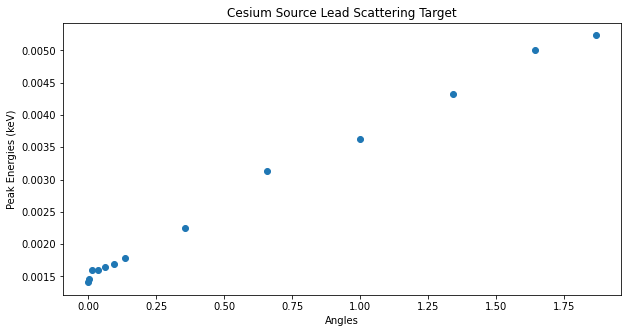

In [13]:
plt.figure()
plt.plot(1-np.cos(np.radians(angles)), 1/shifts,'o')
plt.xlabel('Angles')
plt.ylabel('Peak Energies (keV)')
plt.title('Cesium Source Lead Scattering Target')